In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## 6.1

In [2]:
caps = ['Small_Cap','Mid_Cap','Large_Cap']
stock = {}
for cap in caps:
    for i in range(10):
        file = os.listdir(cap)[i]
        temp = pd.read_csv(cap+'/'+file)
        temp = temp[temp.Series=='EQ']
        stock[file[:-4]] = temp['Close Price']
stock = pd.DataFrame(stock)
stock.head()

,LUXIND,NCC,VENKEYS,LALPATHLAB,ITDC,BAJAJELEC,SONATSOFTW,WELSPUNIND,IRCON,LEMONTREE,...,HDFCBANK,TCS,HEROMOTOCO,BAJFINANCE,TITAN,MARUTI,SUNPHARMA,INFRATEL,HINDALCO,INFY
0,819.60,97.35,1169.70,900.60,650.15,341.15,162.65,90.25,415.3,71.65,...,1553.40,2365.10,3515.45,1332.95,483.65,6823.90,654.45,371.05,198.45,951.55
1,817.50,100.40,1177.00,910.95,636.70,347.00,158.60,90.65,427.0,66.85,...,NaN,2429.15,3619.40,1347.75,488.30,6953.95,652.35,376.55,196.50,955.00
2,819.80,101.45,1188.00,911.70,626.75,349.85,158.25,88.85,421.4,66.95,...,1559.65,2455.35,3645.95,1324.80,481.75,6958.20,650.90,389.90,198.85,952.80
3,820.05,97.00,1156.90,909.75,604.65,334.10,157.40,86.90,407.1,66.40,...,1557.15,2536.20,3592.05,1314.55,471.65,6831.05,653.95,378.90,194.00,961.75
4,817.80,95.45,1161.65,910.25,594.30,336.20,151.90,85.05,399.8,67.70,...,NaN,2507.15,3571.65,1289.15,471.15,6790.55,653.15,378.95,191.00,957.95


## 6.2

In [3]:
daily_returns = stock.pct_change()*100

In [4]:
daily_returns.head()

,LUXIND,NCC,VENKEYS,LALPATHLAB,ITDC,BAJAJELEC,SONATSOFTW,WELSPUNIND,IRCON,LEMONTREE,...,HDFCBANK,TCS,HEROMOTOCO,BAJFINANCE,TITAN,MARUTI,SUNPHARMA,INFRATEL,HINDALCO,INFY
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.256223,3.133025,0.624092,1.149234,-2.068753,1.714788,-2.490009,0.443213,2.817241,-6.699232,...,0.000000,2.708131,2.956947,1.110319,0.961439,1.905802,-0.320880,1.482280,-0.982615,0.362566
2,0.281346,1.045817,0.934579,0.082332,-1.562745,0.821326,-0.220681,-1.985659,-1.311475,0.149589,...,0.402343,1.078567,0.733547,-1.702838,-1.341388,0.061116,-0.222273,3.545346,1.195929,-0.230366
3,0.030495,-4.386397,-2.617845,-0.213886,-3.526127,-4.501929,-0.537125,-2.194710,-3.393450,-0.821509,...,-0.160292,3.292810,-1.478353,-0.773702,-2.096523,-1.827340,0.468582,-2.821236,-2.439024,0.939337
4,-0.274374,-1.597938,0.410580,0.054960,-1.711734,0.628554,-3.494282,-2.128884,-1.793171,1.957831,...,0.000000,-1.145414,-0.567921,-1.932220,-0.106011,-0.592881,-0.122334,0.013196,-1.546392,-0.395113


In [5]:
daily_returns = daily_returns.dropna()

In [6]:
annual_returns = {}
annual_volatility = {}
for i in daily_returns.columns:
    annual_returns[i] = daily_returns[i].mean()*252
    annual_volatility[i] = daily_returns[i].std()* np.sqrt(252)

In [7]:
len(annual_returns),len(annual_volatility)

(30, 30)

In [8]:
# annual_returns,annual_volatility

In [9]:
res_df = pd.DataFrame(annual_returns.items(), columns=['Stock','Annual_Return'])
res_df = res_df.set_index('Stock')
res_df['Annual_Volatility'] = annual_volatility.values()
res_df.head()

,Annual_Return,Annual_Volatility
Stock,,
LUXIND,20.689850,30.203523
NCC,4.814287,40.083695
VENKEYS,30.951209,56.491309
LALPATHLAB,6.148558,23.808391
ITDC,-29.951805,47.523134


## 6.3

In [10]:
from sklearn.cluster import KMeans

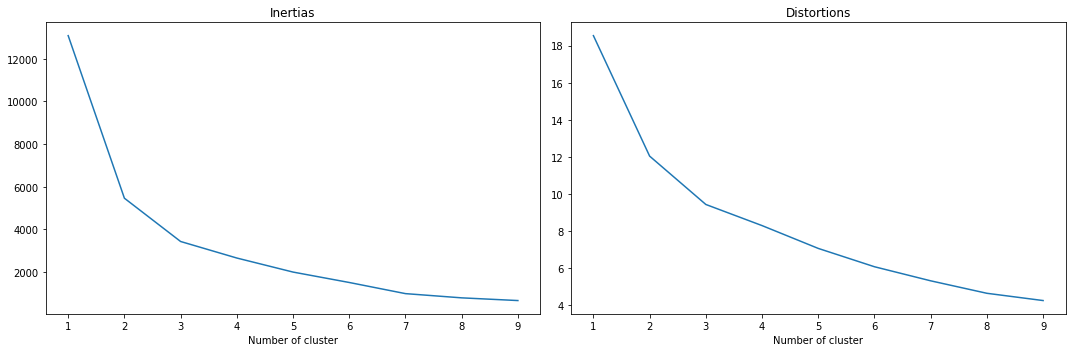

In [11]:
from scipy.spatial.distance import cdist
inertias = {}
distortions = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(res_df)
    inertias[k] = kmeans.inertia_
    distortions[k] = sum(np.min(cdist(res_df, kmeans.cluster_centers_,'euclidean'),axis=1)) / res_df.shape[0]
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(list(inertias.keys()), list(inertias.values()))
plt.xlabel("Number of cluster")
plt.title('Inertias')
plt.subplot(1, 2, 2)
plt.plot(list(distortions.keys()),list(distortions.values()))
plt.xlabel("Number of cluster")
plt.title('Distortions')
plt.tight_layout()
plt.show()

From the above plots, it can be inferred that the k value must be 3

In [12]:
clusters = KMeans(n_clusters=3).fit(res_df)
labels = clusters.labels_
labels

array([1, 0, 1, 0, 2, 1, 1, 2, 0, 0, 0, 2, 0, 2, 0, 1, 2, 1, 2, 0, 0, 0,
       2, 1, 1, 0, 2, 2, 0, 0], dtype=int32)

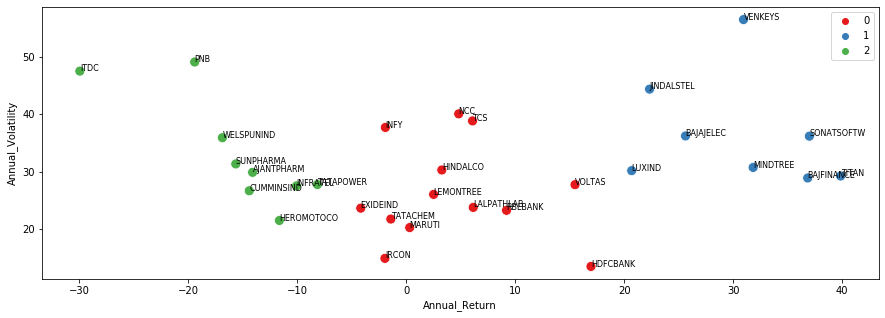

In [13]:
plt.figure(figsize=(15,5))
sns.scatterplot(res_df.Annual_Return, res_df.Annual_Volatility,hue=labels,palette='Set1',s=100)
for i in range(len(res_df)):
    plt.text(res_df.Annual_Return[i], res_df.Annual_Volatility[i], res_df.index[i],fontsize = 8)